
### Class 7
#### Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

#### Extract Data

In [8]:
class InterestRates:

    def __init__(self, Y):
        self.Y = Y

    def USTreasury(self, ratesCurve=False, COBDate=None):
        USTreasuryData = pd.read_csv(f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{self.Y}/all?type=daily_treasury_yield_curve&field_tdr_date_value={self.Y}&page&_format=csv', index_col='Date').iloc[::-1]  
        USTreasuryData.index = pd.to_datetime(USTreasuryData.index)
        
        if ratesCurve == True:
            if COBDate == None:
                return USTreasuryData[USTreasuryData.index == USTreasuryData.index.max()]
            else:
                return USTreasuryData[USTreasuryData.index == COBDate]
        else:
            return USTreasuryData


#### Yield Spread

In [14]:
USTreasuryCurve = InterestRates(Y=2023).USTreasury(ratesCurve=True, COBDate=None)
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-12-29,5.6,5.59,5.4,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.2,4.03


In [18]:
Years = range(1990, 2024)

USTreasuryData = pd.DataFrame()
for Year in tqdm(Years):
    tempData = InterestRates(Y=Year).USTreasury()
    USTreasuryData = pd.concat([USTreasuryData, tempData])


100%|██████████| 34/34 [05:37<00:00,  9.94s/it]


In [24]:
tenorBucket = USTreasuryCurve.columns

USTreasurySpread = pd.DataFrame()
for tenor in tenorBucket:
    yieldSpread = pd.DataFrame(USTreasuryCurve[tenor] - USTreasuryCurve[tenor].values[0]) * 100
    yieldSpread.index = [tenor]
    USTreasurySpread = pd.concat([USTreasurySpread, yieldSpread])
    
USTreasurySpread

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
1 Mo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Mo,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Mo,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Mo,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6 Mo,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 Yr,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Yr,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3 Yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5 Yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7 Yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [26]:
USTreasuryData = USTreasuryData.reindex(columns=tenorBucket)
USTreasuryData

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95


In [28]:
tsYieldSpread = USTreasuryData['10 Yr'] - USTreasuryData['3 Mo']
tsYieldSpread_Neg = tsYieldSpread[tsYieldSpread < 0.0]
tsYieldSpread_High = tsYieldSpread.max()
tsYieldSpread_Low = tsYieldSpread.min()
tsYieldSpread_HighDate = tsYieldSpread[tsYieldSpread == tsYieldSpread_High].index[0]
tsYieldSpread_LowDate = tsYieldSpread[tsYieldSpread == tsYieldSpread_Low].index[0]
tsYieldSpread_Current = tsYieldSpread[tsYieldSpread.index ==tsYieldSpread.index.max()].values[0]
tsYieldSpread_CurrentDate = tsYieldSpread[tsYieldSpread.index ==tsYieldSpread.index.max()].index[0]

In [34]:
print('MARKET REPORT')
print(f'Update On {date.today()}')
print('\nUS Treasury 10Y-3M Yield Spread')
print(f"The US Treasury 10Y-3M spread is a crucial indicator of the difference between long-term and short-term interest rates. It is widely used as an indicator to study curve inversion levels. A 10Y-3M spread that approaches 0 signifies a 'flattening' yield curve. Furthermore, a negative 10Y-3M spread has historically been viewed as a predictor of a recessionary period. It has predicted every recession from {tsYieldSpread.index.min().year} to {tsYieldSpread.index.max().year}, but has occured 6 to 24 months before the recession occuring, and is thus seen as a far-leading indicator. The Fed uses the spread in a model to predict recessions 6 to 24 months ahead.")
print(f"\nAs of {tsYieldSpread_CurrentDate.date()}, the current spread stands at {round(tsYieldSpread_Current*100)} basis points. It has historically oscillated between a maximum of {round(tsYieldSpread_High*100)} basis points on {tsYieldSpread_HighDate.date()}, and a minimum of {round(tsYieldSpread_Low*100)} basis points on {tsYieldSpread_LowDate.date()}.")

MARKET REPORT
Update On 2025-04-12

US Treasury 10Y-3M Yield Spread
The US Treasury 10Y-3M spread is a crucial indicator of the difference between long-term and short-term interest rates. It is widely used as an indicator to study curve inversion levels. A 10Y-3M spread that approaches 0 signifies a 'flattening' yield curve. Furthermore, a negative 10Y-3M spread has historically been viewed as a predictor of a recessionary period. It has predicted every recession from 1990 to 2023, but has occured 6 to 24 months before the recession occuring, and is thus seen as a far-leading indicator. The Fed uses the spread in a model to predict recessions 6 to 24 months ahead.

As of 2023-12-29, the current spread stands at -152 basis points. It has historically oscillated between a maximum of 387 basis points on 1992-05-04, and a minimum of -189 basis points on 2023-06-01.


MARKET REPORT
Update On 2025-04-12

US Treasury 10Y-3M Yield Spread
The US Treasury 10Y-3M spread is a crucial indicator of the difference between long-term and short-term interest rates. It is widely used as an indicator to study curve inversion levels. A 10Y-3M spread that approaches 0 signifies a 'flattening' yield curve. Furthermore, a negative 10Y-3M spread has historically been viewed as a predictor of a recessionary period. It has predicted every recession from 1990 to 2023, but has occured 6 to 24 months before the recession occuring, and is thus seen as a far-leading indicator. The Fed uses the spread in a model to predict recessions 6 to 24 months ahead.

As of 2023-12-29, the current spread stands at -152 basis points. It has historically oscillated between a maximum of 387 basis points on 1992-05-04, and a minimum of -189 basis points on 2023-06-01. The current spread level of -152 basis points falls below the long-term mean reversion level, indicating a potential signal, s

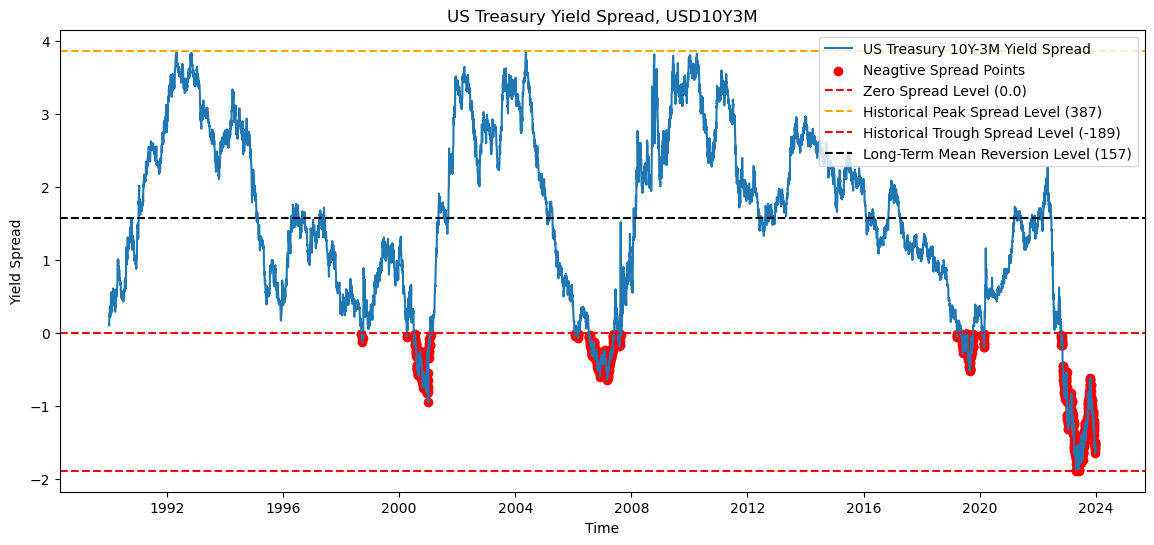

In [51]:
print('MARKET REPORT')
print(f'Update On {date.today()}')
print('\nUS Treasury 10Y-3M Yield Spread')
print(f"The US Treasury 10Y-3M spread is a crucial indicator of the difference between long-term and short-term interest rates. It is widely used as an indicator to study curve inversion levels. A 10Y-3M spread that approaches 0 signifies a 'flattening' yield curve. Furthermore, a negative 10Y-3M spread has historically been viewed as a predictor of a recessionary period. It has predicted every recession from {tsYieldSpread.index.min().year} to {tsYieldSpread.index.max().year}, but has occured 6 to 24 months before the recession occuring, and is thus seen as a far-leading indicator. The Fed uses the spread in a model to predict recessions 6 to 24 months ahead.")
print(f"\nAs of {tsYieldSpread_CurrentDate.date()}, the current spread stands at {round(tsYieldSpread_Current*100)} basis points. It has historically oscillated between a maximum of {round(tsYieldSpread_High*100)} basis points on {tsYieldSpread_HighDate.date()}, and a minimum of {round(tsYieldSpread_Low*100)} basis points on {tsYieldSpread_LowDate.date()}. The current spread level of {round(tsYieldSpread_Current*100)} basis points falls {np.where(tsYieldSpread_Current < tsYieldSpread.mean(), 'below', 'above')} the long-term mean reversion level, indicating a potential signal, suggests taking {np.where(tsYieldSpread_Current < tsYieldSpread.mean(), 'LONG', 'SHORT')} position on USD10Y3M spread.")

plt.figure(figsize = (14,6))
plt.plot(tsYieldSpread, label = "US Treasury 10Y-3M Yield Spread")
plt.scatter(x = tsYieldSpread_Neg.index, y = tsYieldSpread_Neg.values, color = 'r', label = 'Neagtive Spread Points')

plt.axhline(0.0, color='r', linestyle='--', label='Zero Spread Level (0.0)')
plt.axhline(tsYieldSpread_High, color='orange', linestyle='--',
            label=f'Historical Peak Spread Level ({round(tsYieldSpread_High*100)})')
plt.axhline(tsYieldSpread_Low, color='r', linestyle='--',
            label=f'Historical Trough Spread Level ({round(tsYieldSpread_Low*100)})')

plt.axhline(tsYieldSpread.mean(), color='k', linestyle='--',
            label=f'Long-Term Mean Reversion Level ({round(tsYieldSpread.mean()*100)})')

plt.xlabel('Time')
plt.ylabel('Yield Spread')
plt.title('US Treasury Yield Spread, USD10Y3M')
plt.legend(loc='upper right')
plt.show()